In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense,PReLU,Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import splitfolders
import os

In [2]:
input_folders = r"C:\Users\pavani\OneDrive\Pictures\cell_images"

In [3]:
out = r"C:\Users\pavani\OneDrive\Pictures\cell_images\new"

In [8]:
splitfolders.ratio(input_folders,output=out,ratio=(.8,.2),group_prefix=None)

Copying files: 27560 files [02:37, 175.18 files/s]


In [2]:
training_gen=ImageDataGenerator(rescale=1.0/255,
                               rotation_range=40,
                               width_shift_range=0.2,
                               height_shift_range=0.2)

In [4]:
train_data = r"C:\Users\pavani\OneDrive\Pictures\cell_images\new\train"

In [5]:
test_data = r"C:\Users\pavani\OneDrive\Pictures\cell_images\new\val"

In [5]:
training_data = training_gen.flow_from_directory(train_data,target_size=(100,100),batch_size=32,class_mode='binary')

Found 22046 images belonging to 2 classes.


In [6]:
training_data.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [7]:
test_gen = ImageDataGenerator(rescale=1.0/255,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2)

In [8]:
valid_data = test_gen.flow_from_directory(test_data,target_size=(100,100),batch_size=32,class_mode='binary')

Found 5512 images belonging to 2 classes.


In [9]:
cnn= keras.models.Sequential([
                             keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=(100,100,3)),
                             keras.layers.MaxPooling2D(pool_size=(2,2)),
                             keras.layers.Conv2D(filters=64,kernel_size=3),
                             keras.layers.MaxPooling2D(pool_size=(2,2)),
                             keras.layers.Conv2D(filters=128,kernel_size=3),
                             keras.layers.MaxPooling2D(pool_size=(2,2)),
                             keras.layers.Conv2D(filters=256,kernel_size=3),
                             keras.layers.MaxPooling2D(pool_size=(2,2)),
    
                             keras.layers.Dropout(0.5),
                             keras.layers.Flatten(),
                             keras.layers.Dense(units=128,activation='relu'),
                             keras.layers.Dropout(0.1),
                             keras.layers.Dense(units=256,activation='relu'),
                             keras.layers.Dropout(0.25),
                             keras.layers.Dense(units=128,activation='relu'),
                             keras.layers.Dropout(0.1),
                             keras.layers.Dense(units=1,activation='sigmoid')
])

In [10]:
cnn.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [11]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [14]:
es = EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1,mode='auto')
ms = ModelCheckpoint(monitor='val_accuracy',filepath=',/bestmodel.h5',verbose=1,save_best_only=True,mode='auto')
cd = [es,ms]

In [15]:
hs = cnn.fit_generator(generator=training_data,epochs=10,verbose=1,validation_data=valid_data,validation_steps=16,callbacks=cd)

C:\Users\pavani\AppData\Local\Temp\ipykernel_21168\3360712852.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hs = cnn.fit_generator(generator=training_data,epochs=10,verbose=1,validation_data=valid_data,validation_steps=16,callbacks=cd)


Epoch 1/10
689/689 [==============================] - ETA: 0s - loss: 0.4393 - accuracy: 0.7863
Epoch 1: val_accuracy improved from -inf to 0.89844, saving model to ,\bestmodel.h5
689/689 [==============================] - 150s 217ms/step - loss: 0.4393 - accuracy: 0.7863 - val_loss: 0.3138 - val_accuracy: 0.8984
Epoch 2/10
689/689 [==============================] - ETA: 0s - loss: 0.2662 - accuracy: 0.9034
Epoch 2: val_accuracy improved from 0.89844 to 0.91602, saving model to ,\bestmodel.h5
689/689 [==============================] - 144s 209ms/step - loss: 0.2662 - accuracy: 0.9034 - val_loss: 0.2072 - val_accuracy: 0.9160
Epoch 3/10
689/689 [==============================] - ETA: 0s - loss: 0.2475 - accuracy: 0.9146
Epoch 3: val_accuracy improved from 0.91602 to 0.92188, saving model to ,\bestmodel.h5
689/689 [==============================] - 144s 209ms/step - loss: 0.2475 - accuracy: 0.9146 - val_loss: 0.2373 - val_accuracy: 0.9219
Epoch 4/10
689/689 [=============================

In [21]:
acc= cnn.evaluate_generator(valid_data)[0]

C:\Users\pavani\AppData\Local\Temp\ipykernel_21168\1534170427.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc= cnn.evaluate_generator(valid_data)[0]


In [22]:
acc*100

20.40867656469345

In [33]:
from keras.utils import load_img,img_to_array
import numpy as np

In [39]:
path = r"C:\Users\pavani\OneDrive\Pictures\cell_images\new\train\Parasitized\C59P20thinF_IMG_20150803_113139_cell_37.png"

In [40]:
img = load_img(path,target_size=(100,100))

In [41]:
input_arr = img_to_array(img)/255

In [42]:
input_arr.shape

(100, 100, 3)

In [43]:
input_arr = np.expand_dims(input_arr,axis=0)

In [44]:
pred = cnn.predict(input_arr)

1/1 [==============================] - 0s 25ms/step


In [45]:
pred

array([[0.03260381]], dtype=float32)

In [46]:
import cv2
import matplotlib.pyplot as plt

In [54]:
img = cv2.imread(r"C:\Users\pavani\OneDrive\Pictures\cell_images\Uninfected\C1_thinF_IMG_20150604_104942_cell_151.png")

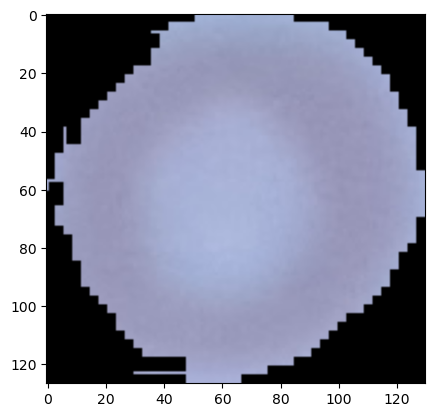

In [55]:
plt.imshow(img)

In [56]:
img = cv2.resize(img,(100,100))

In [57]:
img_input = img.reshape(1,100,100,3)

In [59]:
pred=cnn.predict(img_input)

1/1 [==============================] - 0s 32ms/step


In [60]:
pred

array([[1.3123141e-10]], dtype=float32)

In [63]:
float(pred)

1.3123141462401122e-10